# TODO
Check out scipy's dendogram:  
C:\Users\colin\anaconda3\Lib\site-packages\scipy\cluster\heirarchy

In [1]:
import numpy
from matplotlib import pyplot
from dataclasses import dataclass
from typing import Dict
import sys
sys.path.insert(1, 'C:/Users/colin/Documents/GitHub/fhdc/src/fhdc')
from data_classes import Level

In [2]:
# clusters = [0,1,2,3]
level0 = Level(
    level_id = 0,
    clusters = [],
    merged_clusters = [0,3],
    new_cluster = 4
)
# clusters = [1,2,4]
level1 = Level(
    level_id = 1,
    clusters = [],
    merged_clusters = [2,1],
    new_cluster = 5
)
# clusters = [4,5]
level2 = Level(
    level_id = 2,
    clusters = [],
    merged_clusters = [4,5],
    new_cluster = 6
)
# clusters = [6]
levels = [level0, level1, level2]
levels = dict(zip([0,1,2], levels))
print(levels)
# Number of initial Clusters = number of Levels + 1

{0: <data_classes.Level object at 0x00000121D12EB130>, 1: <data_classes.Level object at 0x00000121D12EB0D0>, 2: <data_classes.Level object at 0x00000121D12EB160>}


In [3]:
@dataclass
class PlottingObject():
    x: float
    ymin: int
    ymax: int

In [ ]:
def first_pass(levels: Dict[int, Level]) -> Dict[int, PlottingObject]:
    plotting_objects = {}
    original_documents_stop = len(levels)
    for level in levels:
        for merged_cluster in levels[level].merged_clusters:
            if merged_cluster < original_documents_stop:
                plotting_objects[merged_cluster] = PlottingObject(x=None, ymin=0, ymax=level)
            else:
                plotting_objects[merged_cluster] = PlottingObject(x=None, ymin=None, ymax=level)

In [45]:
def create_dendogram(levels: Lict[int, Level]):
    
    fig, ax = pyplot.subplots()
    # last 2 are paired
    last2 = list(xticks.keys())[-2:]
    ax.vlines(
        x = last2[0],
        ymin = 0,
        ymax = 1
    )
    ax.vlines(
        x = last2[1],
        ymin = 0,
        ymax = 1
    )
    ax.hlines(
        y = 1,
        xmin = min(last2),
        xmax = max(last2)
    )
    pyplot.xticks(list(xticks.keys()), list(xticks.values()))
    pyplot.show()
    #for key in list(xticks.keys()).reverse()[:-2]:
    return

In [4]:
num_initial_clusters = len(levels) + 1
x_tick_labels = []
for level in levels:
    x_tick_labels += level.merged_clusters
x_tick_labels = [label for label in x_tick_labels if label in numpy.arange(0,num_initial_clusters)]
x_tick_labels.reverse()
xticks = {k:v for k,v in zip(numpy.arange(0,num_initial_clusters), x_tick_labels)}
xticks

{0: 1, 1: 2, 2: 3, 3: 0}

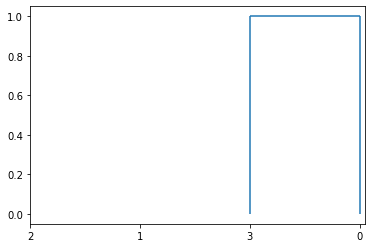

In [46]:
create_dendogram(xticks=xticks)

In [15]:
all_clusters = numpy.arange(0,10)
merged_clusters = [3,4]
new_cluster = 10

start_level=1
stop_level=2

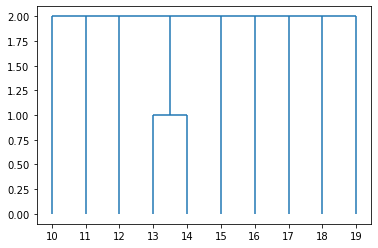

In [26]:
fig, ax = pyplot.subplots()
for cluster in [x for x in all_clusters if x not in merged_clusters]:
    ax.vlines(
        x = cluster,
        ymin = 0,
        ymax = stop_level
    )

ax.vlines(
    x = 3,
    ymin = 0,
    ymax = 1
)
ax.vlines(
    x = 4,
    ymin = 0,
    ymax = 1
)

ax.vlines(
    x=sum(merged_clusters)/2,
    ymin=start_level,
    ymax=stop_level
)

ax.hlines(
    y = 1,
    xmin = 3,
    xmax = 4
)
ax.hlines(
    y = 2,
    xmin = 0,
    xmax = 9
)

pyplot.xticks(all_clusters, numpy.arange(10,20));
pyplot.show()

In [10]:
pyplot.vlines?

Signature:
pyplot.vlines(
    x,
    ymin,
    ymax,
    colors=None,
    linestyles='solid',
    label='',
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot vertical lines at each *x* from *ymin* to *ymax*.

Parameters
----------
x : float or array-like
    x-indexes where to plot the lines.

ymin, ymax : float or array-like
    Respective beginning and end of each line. If scalars are
    provided, all lines will have same length.

colors : list of colors, default: :rc:`lines.color`

linestyles : {'solid', 'dashed', 'dashdot', 'dotted'}, optional

label : str, default: ''

Returns
-------
`~matplotlib.collections.LineCollection`

Other Parameters
----------------
**kwargs : `~matplotlib.collections.LineCollection` properties.

See Also
--------
hlines : horizontal lines
axvline : vertical line across the Axes

Notes
-----


.. note::
    In addition to the above described arguments, this function can take
    a *data* keyword argument. If such a *data* argument is given,
    the 